In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('../타이타닉/train.csv')
df_test = pd.read_csv('../타이타닉/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df_train.shape

(891, 12)

In [8]:
for col in df_train.columns: # {:>10}은 오른쪽으로 정렬시키는 것.
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
print(msg)    

column:   Embarked	 Percent of NaN value: 0.22%


In [9]:
for col in df_test.columns: # {:>10}은 오른쪽으로 정렬시키는 것.
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
print(msg)    

column:   Embarked	 Percent of NaN value: 0.00%


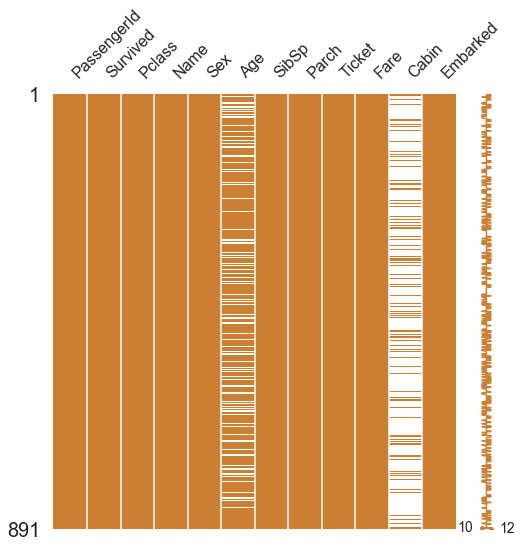

In [10]:
msno.matrix(df=df_train.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))

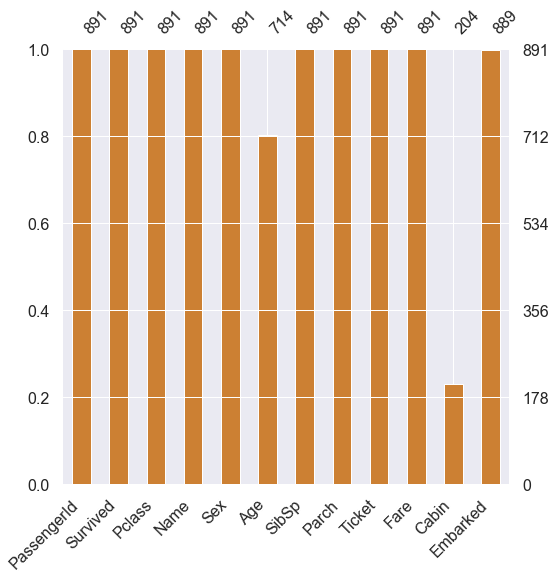

In [11]:
msno.bar(df=df_train.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.2))

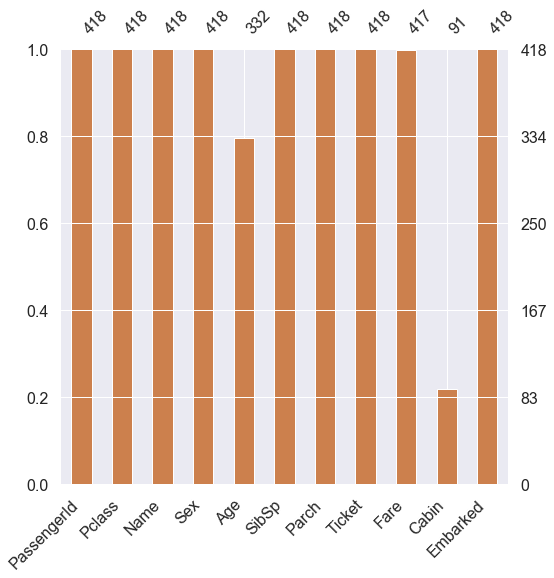

In [12]:
msno.bar(df=df_test.iloc[:, :], figsize = (8, 8), color = (0.8, 0.5, 0.3))

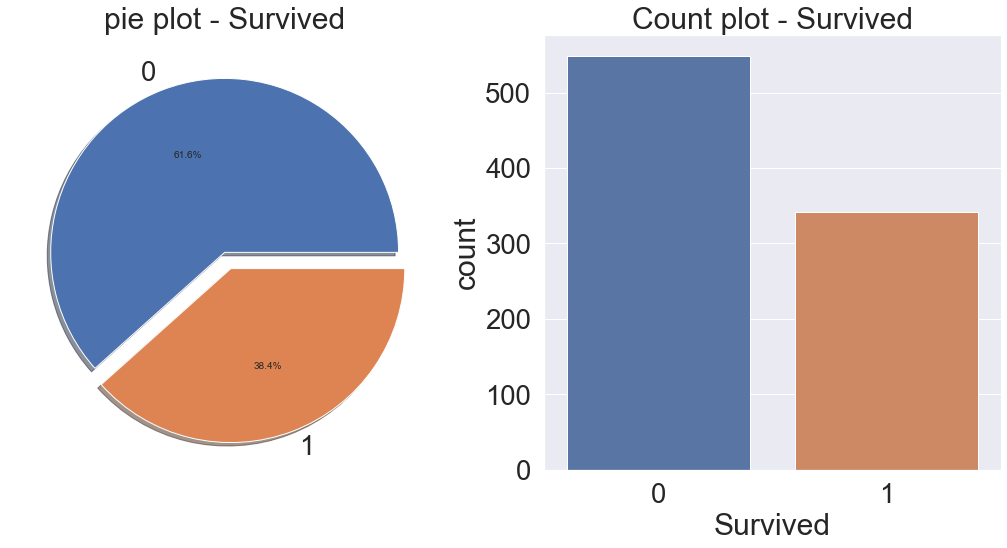

In [13]:
f, ax  = plt.subplots(1, 2, figsize = (18, 8)) # subplot 은 한 코드에 여러가지 그래프를출력
                                               # 여기 1행 2열 로 출력한 것.

df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = df_train, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()


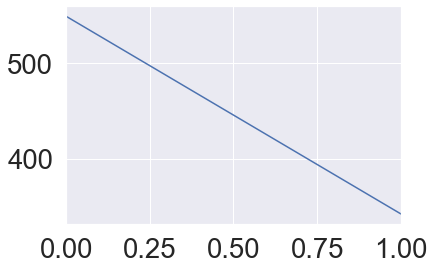

In [14]:
df_train['Survived'].value_counts().plot() # df_train['Survived'].value_counts()은 항상 Series 형태. 왜냐하면 일관성 때문!
                                           # 여기서 Series는 pandas 안에 있는 기능으로써 .plot() 같은 구현을 도와준다.

##### ***** 이제부터 EDA 진행 *****

In [15]:
df_train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [16]:
df1=df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count() # as_index 는 Pclass 에 대한 index 설정


In [17]:
df1.shape # as_index를 True 으로 설정해주어야 shape이 완성됨

(3, 1)

In [18]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


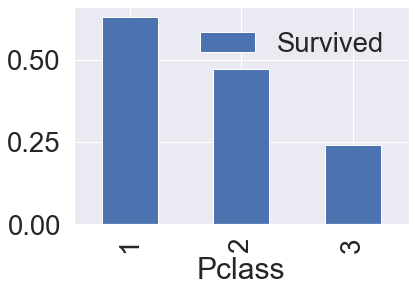

In [19]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar()
# 이것으로 인해 클래스별 생존률을 얻을 수 있다.

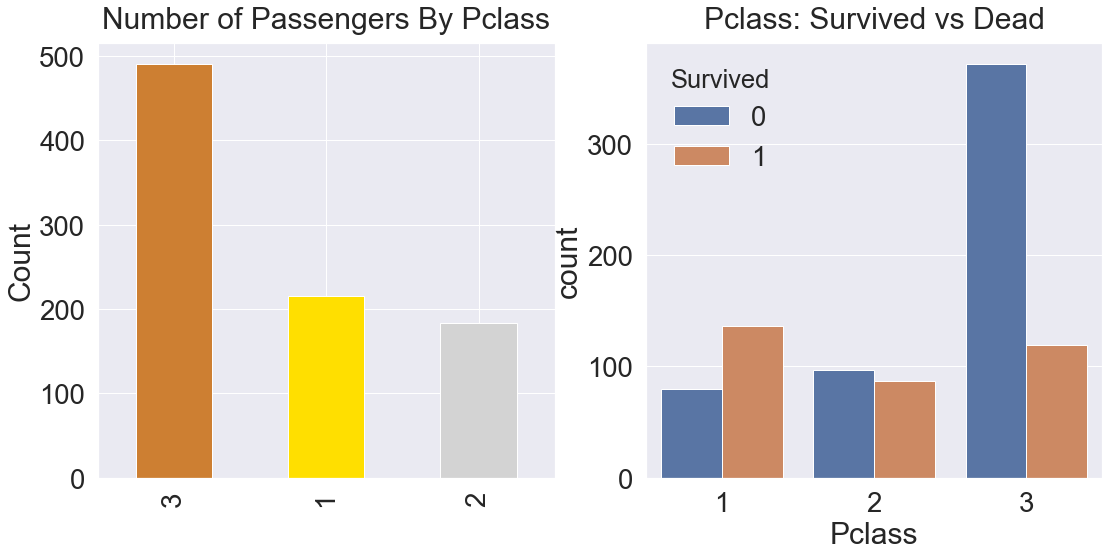

In [20]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
plt.show()

sex 성별

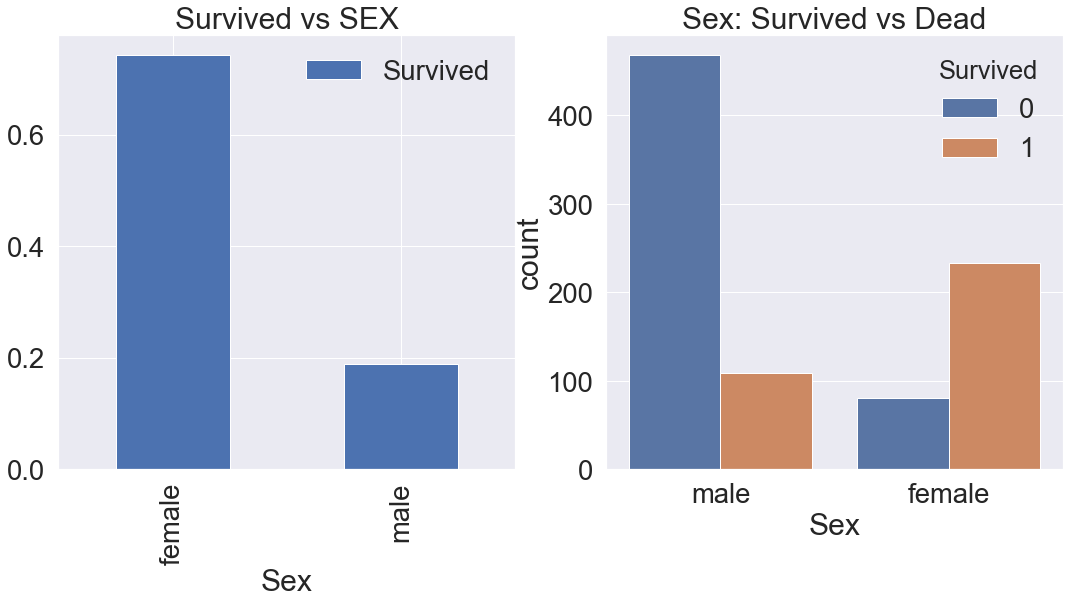

In [21]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs SEX')
sns.countplot('Sex', hue = 'Survived',data = df_train,ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [22]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [23]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


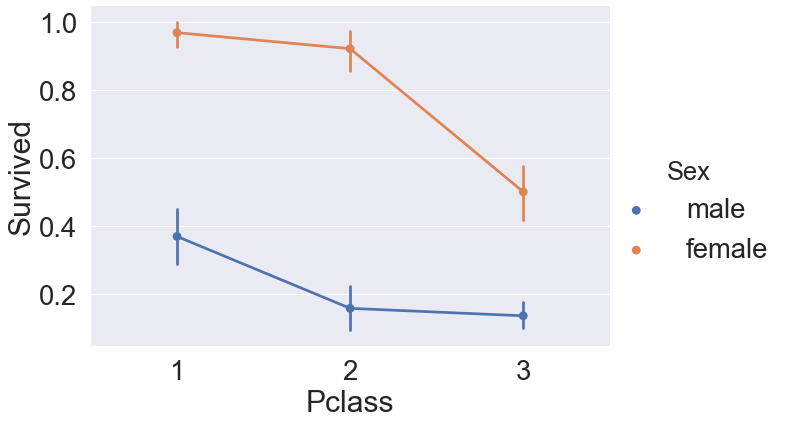

In [24]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train,
              size=6, aspect=1.5)

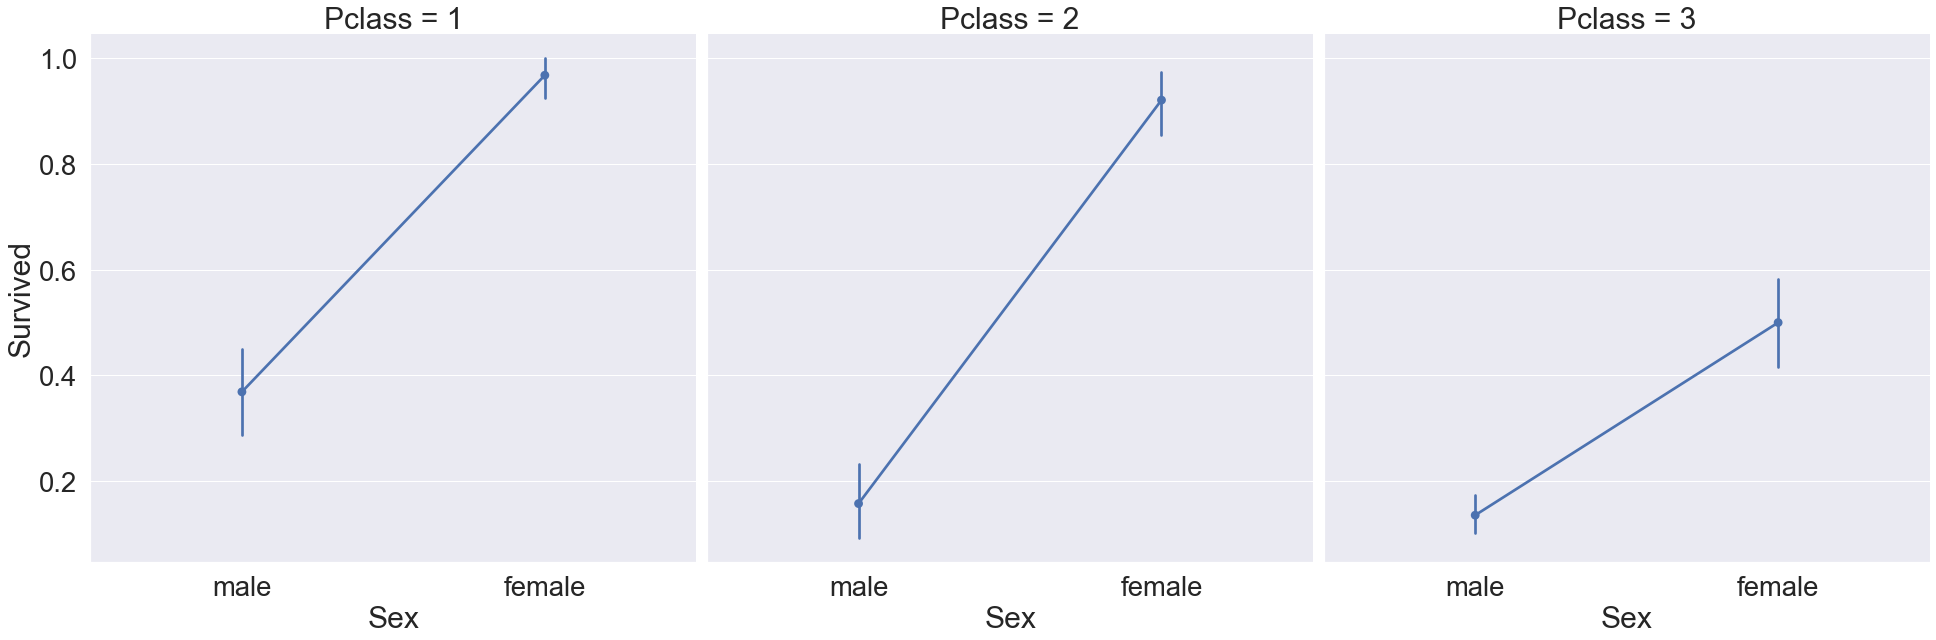

In [25]:
sns.factorplot(x='Sex',y='Survived', col = 'Pclass',
              data = df_train, satureation =.5,
              size=9, aspect=1) # 여기서 위아래로 짝대기는 오차범위

In [26]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승겍 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승겍 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


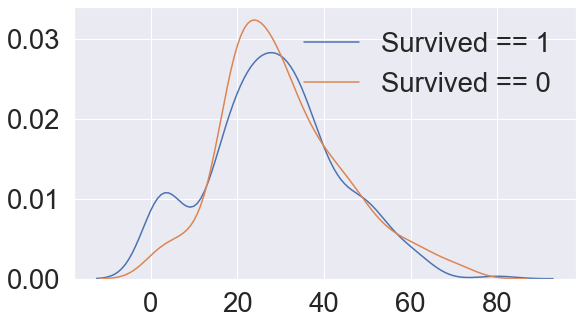

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

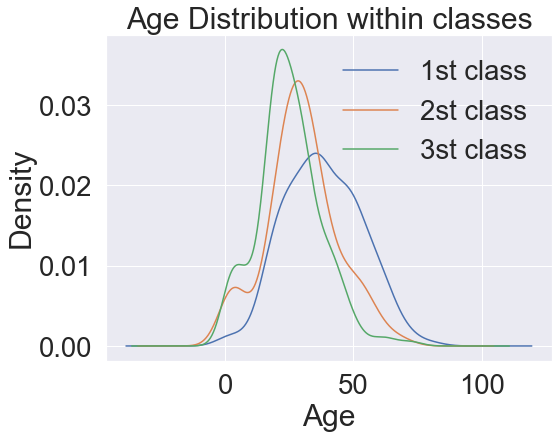

In [28]:
plt.figure(figsize=(8, 6))
df_train[df_train['Pclass']==1]['Age'].plot(kind='kde')
df_train[df_train['Pclass']==2]['Age'].plot(kind='kde')
df_train[df_train['Pclass']==3]['Age'].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st class', '2st class', '3st class'])
plt.show()


Text(0.5, 0, 'sdf')

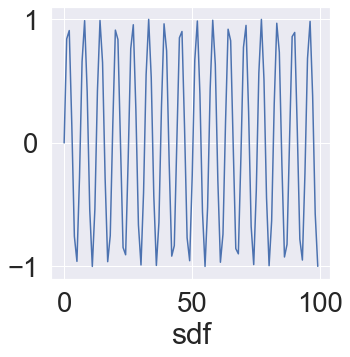

In [29]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
a = np.arange(100)
b = np.sin(a)

ax.plot(b)
ax.set_xlabel('sdf') # ax할댄 set붙여주기!

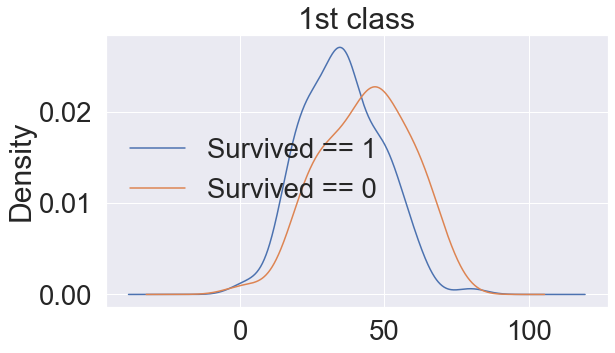

In [30]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
df_train[(df_train['Pclass']==1)&(df_train['Survived']==1)]['Age'].plot(kind='kde')
df_train[(df_train['Pclass']==1)&(df_train['Survived']==0)]['Age'].plot(kind='kde')
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('1st class')
plt.show()

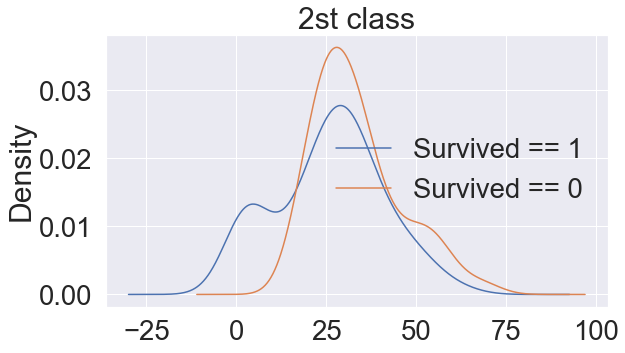

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
df_train[(df_train['Pclass']==2)&(df_train['Survived']==1)]['Age'].plot(kind='kde')
df_train[(df_train['Pclass']==2)&(df_train['Survived']==0)]['Age'].plot(kind='kde')
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('2st class')
plt.show()

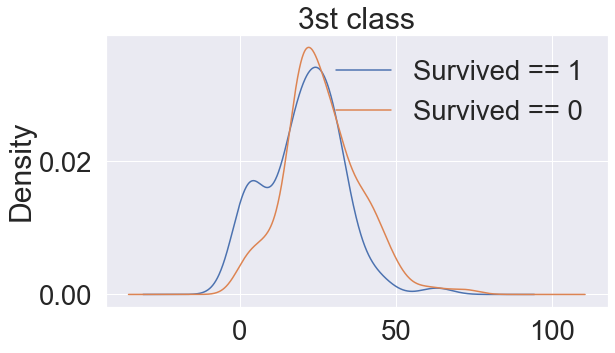

In [32]:
fig, ax = plt.subplots(1, 1, figsize = (9, 5))
df_train[(df_train['Pclass']==3)&(df_train['Survived']==1)]['Age'].plot(kind='kde')
df_train[(df_train['Pclass']==3)&(df_train['Survived']==0)]['Age'].plot(kind='kde')
plt.legend(['Survived == 1', 'Survived == 0'])
plt.title('3st class')
plt.show()

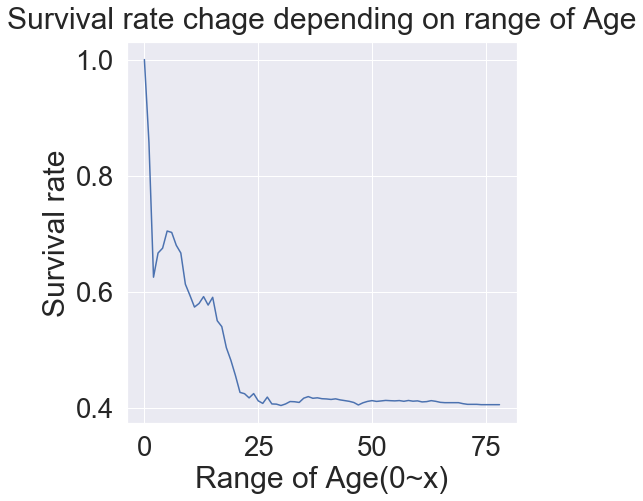

In [33]:
commulate_survival_ratio = []
for i in range(1, 80): # 1살부터 80살
    commulate_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']<i]['Survived']))
    
plt.figure(figsize = (7, 7))
plt.plot(commulate_survival_ratio)
plt.title('Survival rate chage depending on range of Age', y = 1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

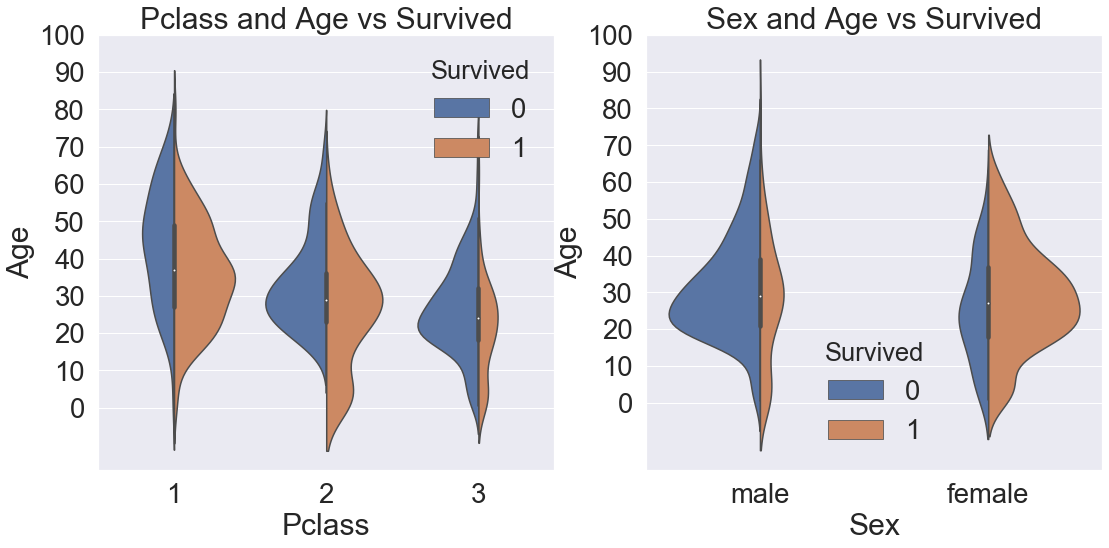

In [34]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot('Pclass', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# split 는 서로 겹치게 하는것, scale은 'count', 'area' 등등 입력에 따라 분포가 설명하는 것이 다름.

sns.violinplot('Sex', 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()